In [1]:
import os
import json
import xmltodict

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot

In [3]:
img_path = r"D:\OPEN_SOURCE\PycharmProjects\TEST\training_data"
label_path = r"D:\OPEN_SOURCE\PycharmProjects\TEST\training_data_label"
height, width = 256, 256

In [8]:
x_train, y_train = [], []
for file in os.listdir(label_path):
    f = open(os.path.join(label_path, file))
    temp_dict = xmltodict.parse(f.read())['annotation']
    temp_filename = temp_dict['filename']
    temp_bndbox = temp_dict['object']['bndbox']
    temp_img = Image.open(os.path.join(img_path, temp_filename))
    y_train.append(np.array([int(temp_bndbox['xmin'])*height//temp_img.height,\
                             int(temp_bndbox['xmax'])*height//temp_img.height,\
                            int(temp_bndbox['ymin'])*width//temp_img.width,\
                            int(temp_bndbox['ymax'])*width//temp_img.width]))
    temp_img = temp_img.resize((height, width))
    x_train.append(np.array(temp_img))
    break

In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
x_train.shape, y_train.shape

((1, 256, 256, 3), (1, 4))

In [9]:
y_train[0]

array([ 12, 175,  27, 201])

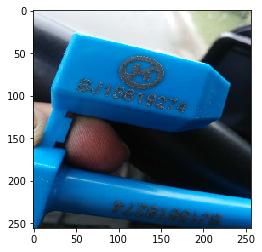

In [10]:
pyplot.imshow(x_train[0])